In [1]:
# Authors: A. Wenteler, M. Huebner

In [7]:
import pandas as pd 
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [29]:
# load cross_split_overlap_values.pkl
with open('cross_split_overlap_values.pkl', 'rb') as f:
    cross_split_overlap_values = pkl.load(f)

cso_dict = {
    'scbert': cross_split_overlap_values[0],
    'scgpt': cross_split_overlap_values[1]
}

In [30]:
cso_dict

{'scbert': 0.22199897797277968, 'scgpt': 0.6064123605523986}

In [9]:
pivot_0 = pd.read_csv('pivot_0_non_adj.csv')
pivot_7 = pd.read_csv('pivot_7_non_adj.csv')

In [10]:
mse_scores_0_scbert = pivot_0['scbert']
mse_scores_7_scbert = pivot_7['scbert']
mse_scores_0_scgpt = pivot_0['scgpt']
mse_scores_7_scgpt = pivot_7['scgpt']

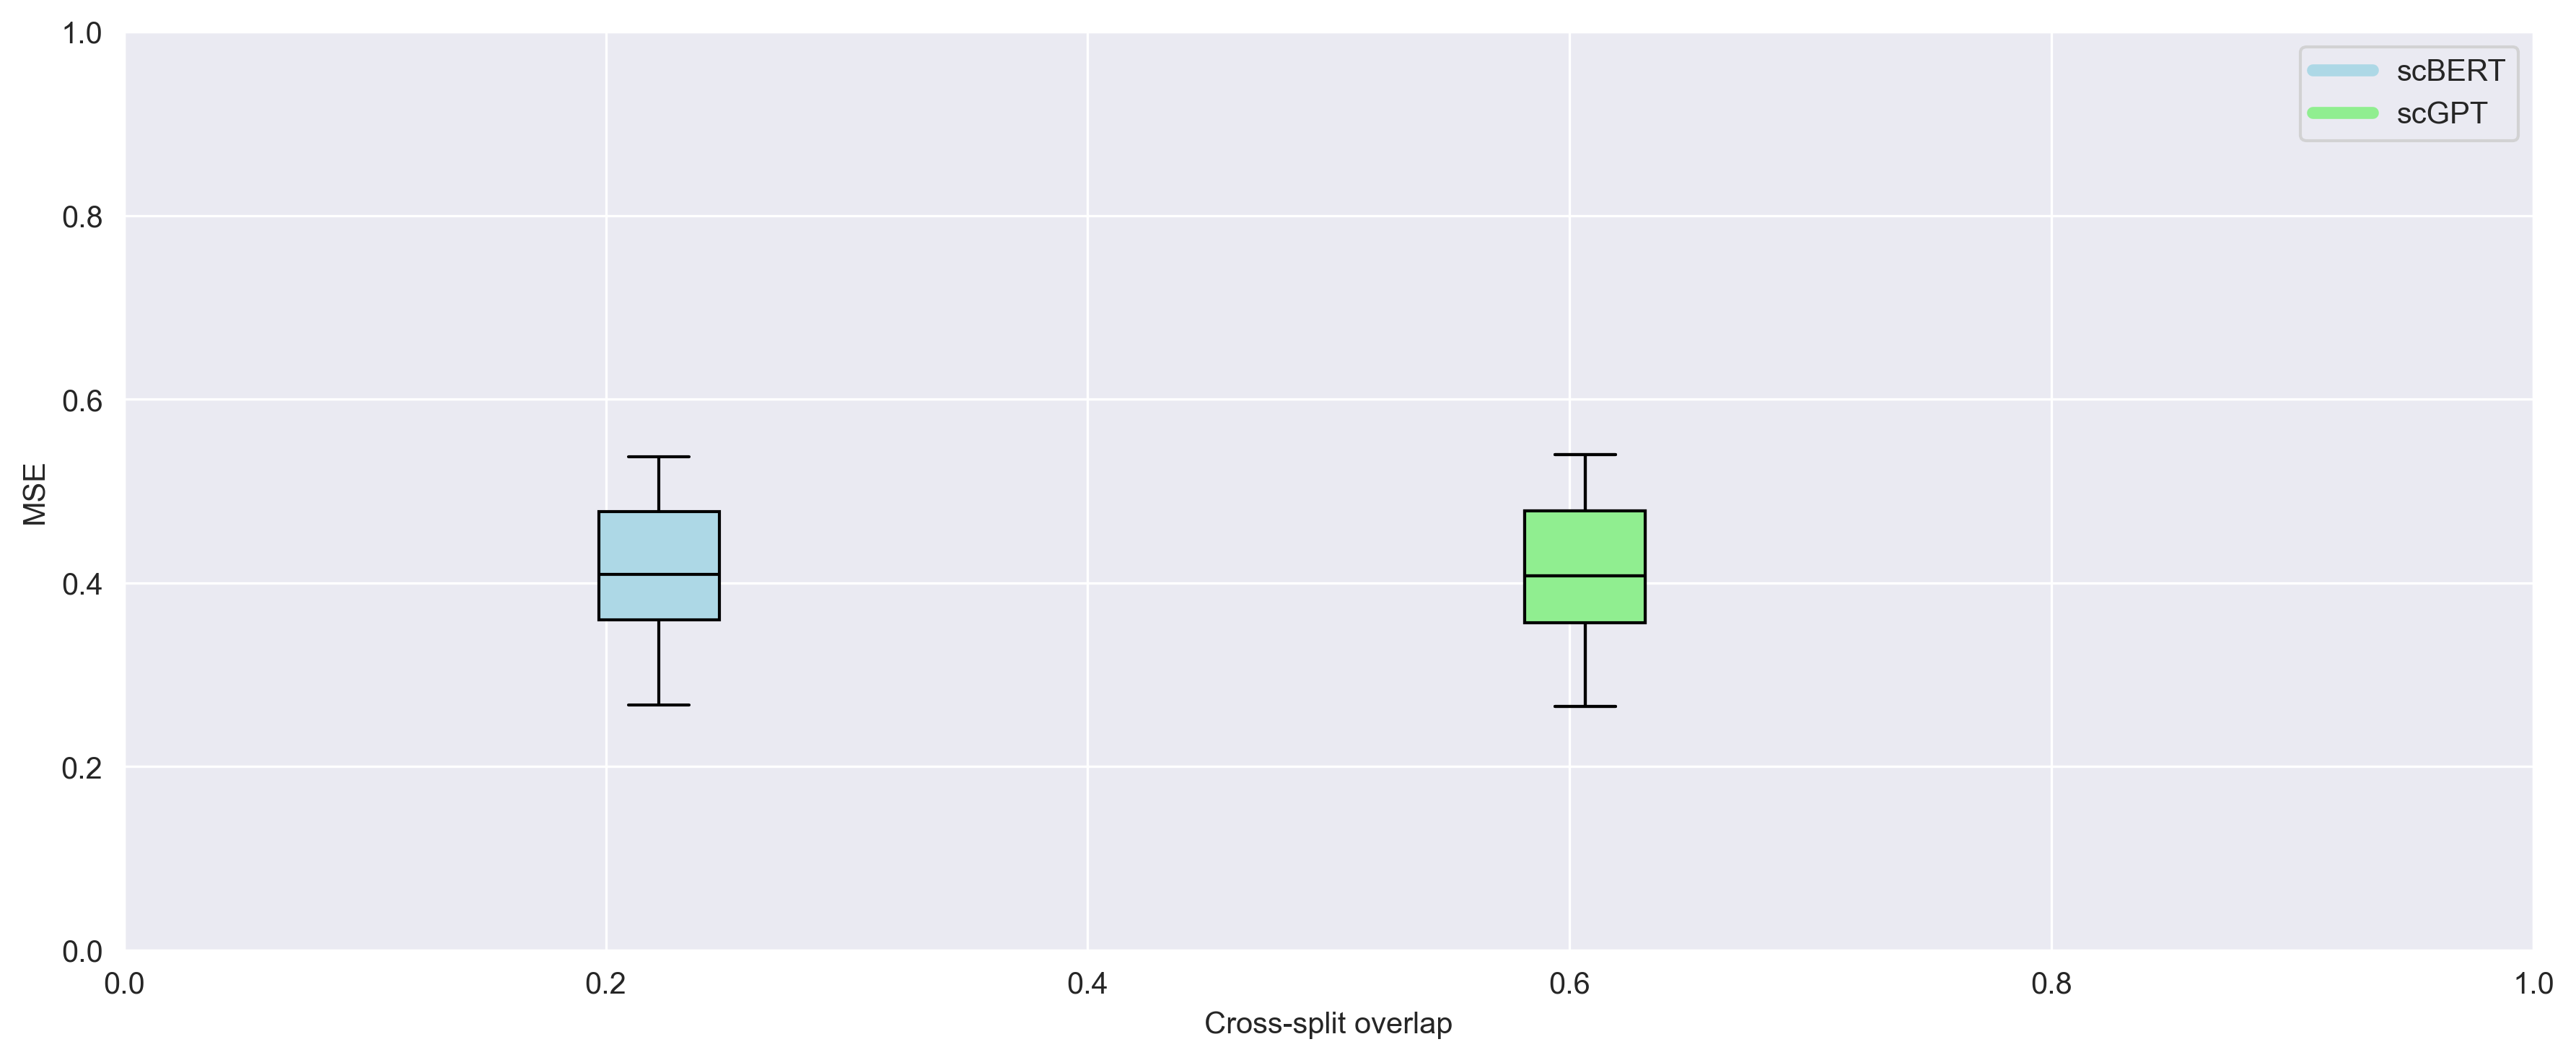

In [27]:
# Create box plots
plt.figure(figsize=(12, 5), dpi=300)

# Common properties for black color
boxprops_scbert = dict(facecolor='lightblue', color='black')
boxprops_scgpt = dict(facecolor='lightgreen', color='black')
medianprops = dict(color='black')
meanprops = dict(color='black')
capprops = dict(color='black')
whiskerprops = dict(color='black')
flierprops = dict(markerfacecolor='black', markeredgecolor='black')

# Plot for scbert and scgpt at CSO 0
plt.boxplot([mse_scores_0_scbert, mse_scores_0_scgpt],
            positions=[cso_dict['scbert'], cso_dict['scgpt']],
            widths=0.05,
            boxprops=boxprops_scbert,
            medianprops=medianprops,
            meanprops=meanprops,
            capprops=capprops,
            whiskerprops=whiskerprops,
            flierprops=flierprops,
            patch_artist=True,
            manage_ticks=False)
plt.boxplot([mse_scores_0_scgpt],
            positions=[cso_dict['scgpt']],
            widths=0.05,
            boxprops=boxprops_scgpt,
            medianprops=medianprops,
            meanprops=meanprops,
            capprops=capprops,
            whiskerprops=whiskerprops,
            flierprops=flierprops,
            patch_artist=True,
            manage_ticks=False)
plt.xlim(0, 1)
plt.xticks(np.arange(0, 1.2, 0.2))
plt.ylim(0, 1)
plt.xlabel('Cross-split overlap')
plt.ylabel('MSE')
# Add legend
plt.legend([plt.Line2D([0], [0], color='lightblue', lw=4),
            plt.Line2D([0], [0], color='lightgreen', lw=4)],
           ['scBERT', 'scGPT'], loc='upper right')

# Show plot
plt.tight_layout()
plt.savefig('context_alignment_0.pdf')

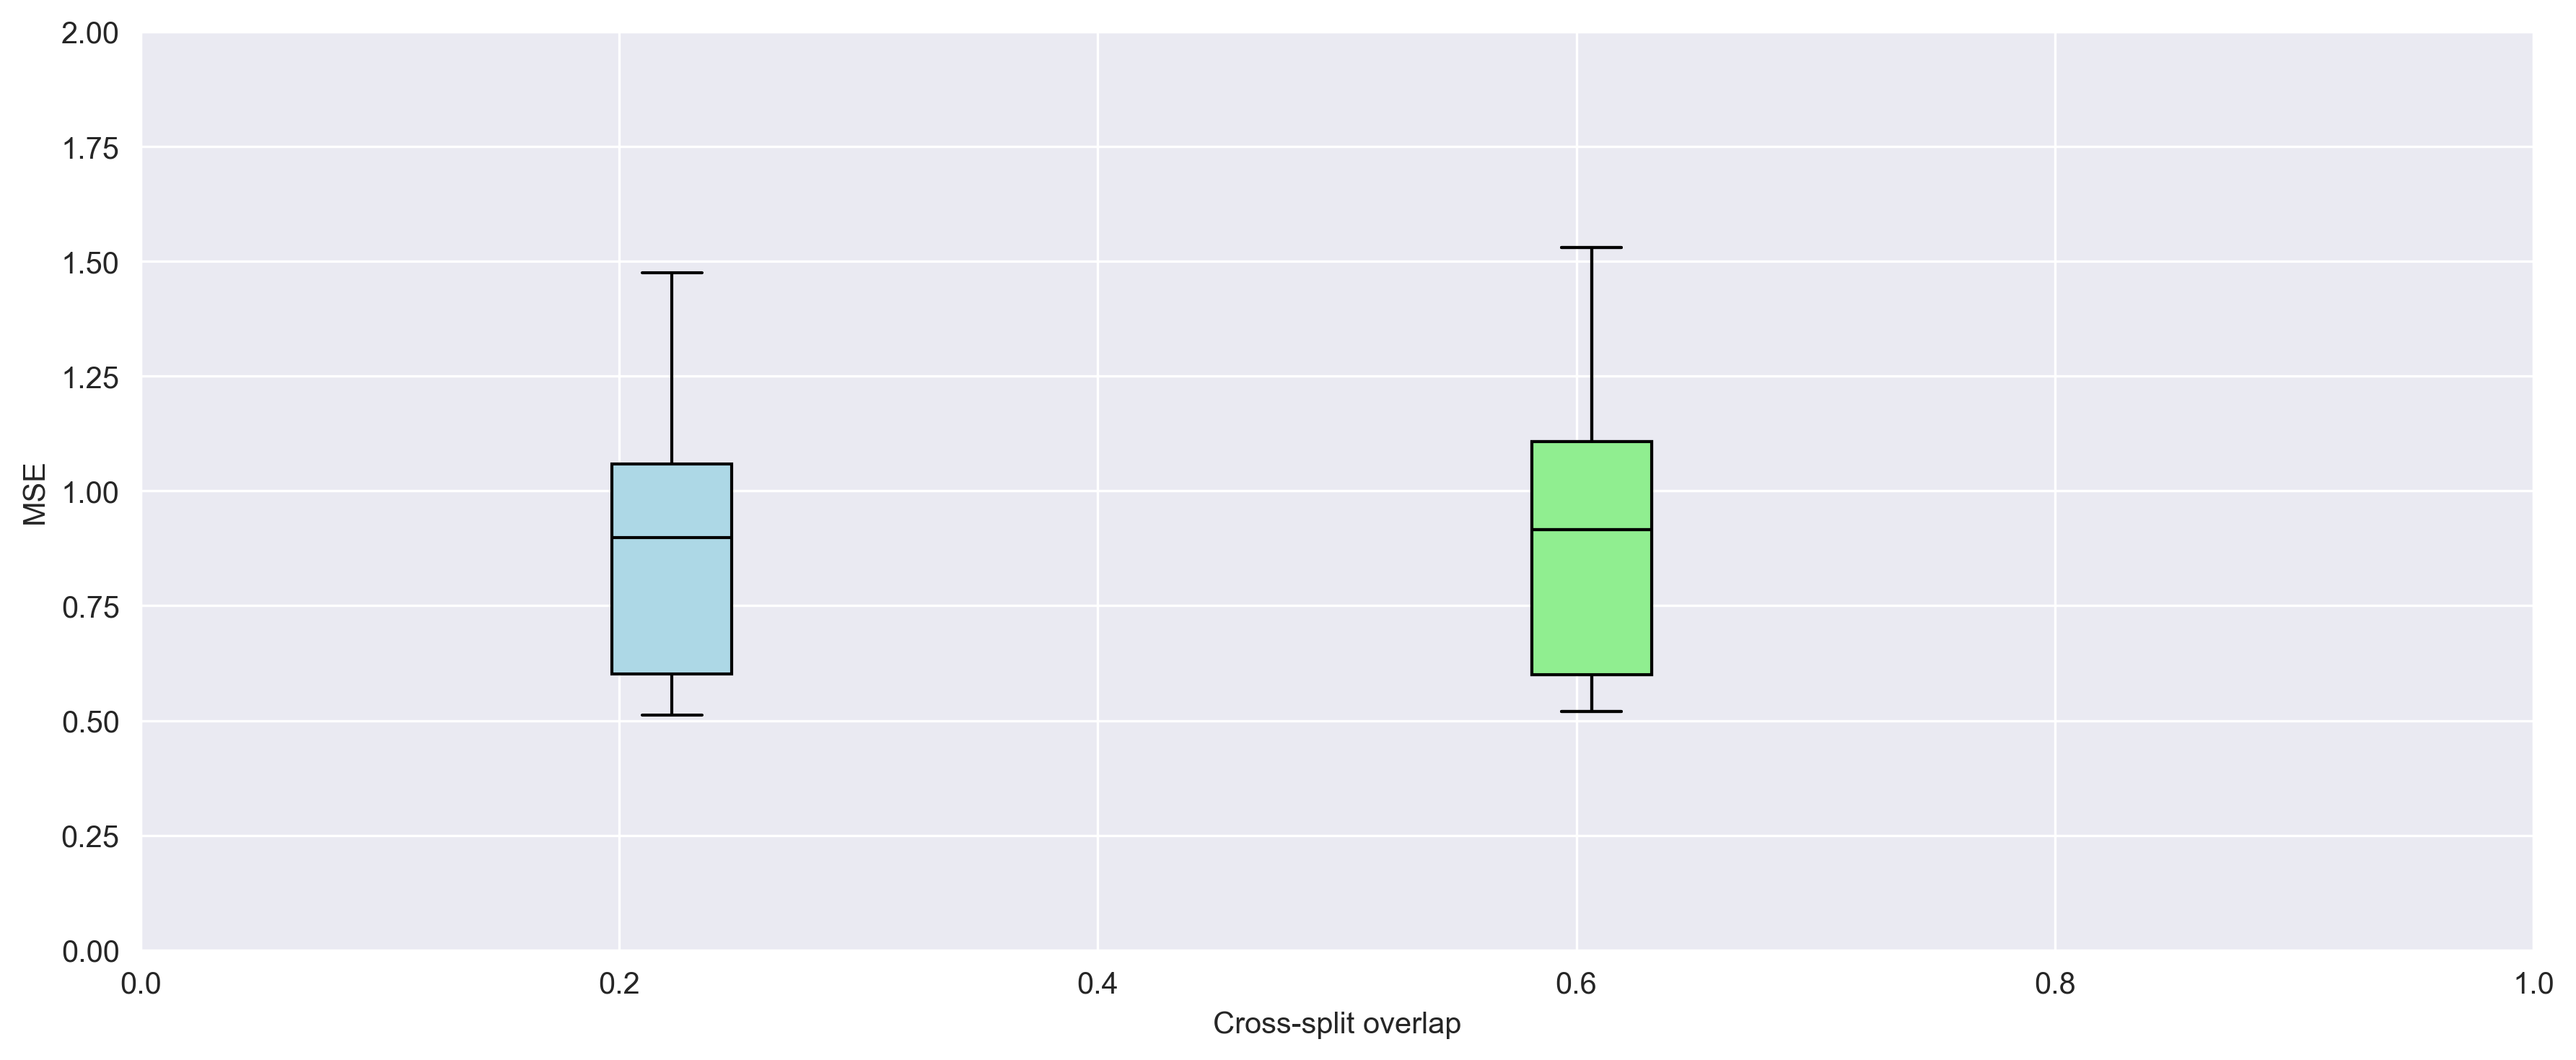

In [28]:
plt.figure(figsize=(12, 5), dpi=300)
plt.boxplot([mse_scores_7_scbert, mse_scores_7_scgpt],
            positions=[cso_dict['scbert'], cso_dict['scgpt']],
            widths=0.05,
            boxprops=boxprops_scbert,
            medianprops=medianprops,
            meanprops=meanprops,
            capprops=capprops,
            whiskerprops=whiskerprops,
            flierprops=flierprops,
            patch_artist=True,
            manage_ticks=False)
plt.boxplot([mse_scores_7_scgpt],
            positions=[cso_dict['scgpt']],
            widths=0.05,
            boxprops=boxprops_scgpt,
            medianprops=medianprops,
            meanprops=meanprops,
            capprops=capprops,
            whiskerprops=whiskerprops,
            flierprops=flierprops,
            patch_artist=True,
            manage_ticks=False)
plt.xlim(0, 1)
plt.xlabel('Cross-split overlap')
plt.ylabel('MSE')
plt.xticks(np.arange(0, 1.2, 0.2))
plt.ylim(0, 2)

# plt.legend([plt.Line2D([0], [0], color='lightblue', lw=4),
#             plt.Line2D([0], [0], color='lightgreen', lw=4)],
#            ['scBERT', 'scGPT'], loc='upper right')

plt.tight_layout()
plt.savefig('context_alignment_7.pdf')